In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from astropy.nddata import CCDData
from ccdproc import trim_image

# need to get import to work in notebook w/o global package install
import sys  
sys.path.append('..')

from apextract import trace, extract

Note: while we *are* putting these images into proper units, and trimming, we are not calibrating with flats or biases right now.

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


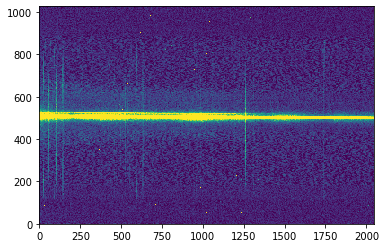

In [2]:
sci = '../../pydis_example/apo05/05may31.0010r.fits' # spectrum of a star

from astropy import units as u
# read in CCD data, don't assign units right now (maybe should be ADU)
img = CCDData.read(sci, unit=u.dimensionless_unscaled)
# put in units of ADU/s
img.data = img.data / (img.header['EXPTIME'])
img.unit = u.adu / u.s

# trim off bias section
img = trim_image(img, fits_section=img.header['DATASEC'])

plt.imshow(img, origin='lower', aspect='auto')
plt.clim(np.percentile(img, (5, 98)))
plt.show()

In [3]:
img.header

SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 2098                                                  
NAXIS2  =                 1078                                                  
OBSERVAT= 'APO'                / Per the IRAF observatory list                  
TELESCOP= '3.5m'                                                                
ST      = +1.8834346666700E+01 / LST per TCC LST (hours)                        
RADECSYS= 'FK5'                / Coordinate system, per TCC ObjSys              
EPOCH   = +2.0000000000000E+03 / Epoch, per TCC ObjSys                          
RA      = '17:19:54.99'        / RA, from TCC ObjNetPos                         
DEC     = '26:30:06.60'        / Dec, from TCC ObjNetPos                        
HA      = +1.5024045333700E+

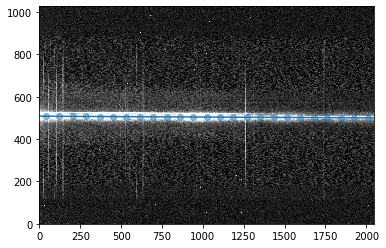

(1028, 2048)
(2048,)


In [4]:
tr = trace(img, display=True, nbins=25)

print(img.shape)
print(tr.shape)

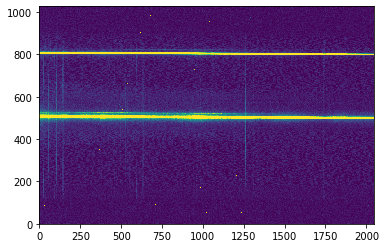

In [5]:
fake_img = np.copy(img.data)
fake_img[700:900,:] = fake_img[700:900,:] + (fake_img[400:600,:] - np.nanmedian(fake_img))/5.

plt.imshow(fake_img, origin='lower', aspect='auto')
plt.clim(np.percentile(fake_img, (5, 98)))
plt.show()


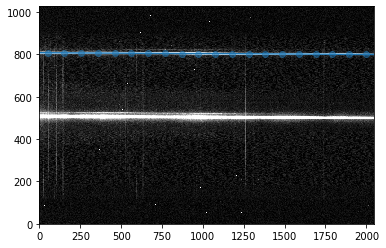

In [6]:
# you can push it to trace other faint stuff if there's e.g. multiple sources in the slit
_ = trace(fake_img, display=True, guess=800, window=50)

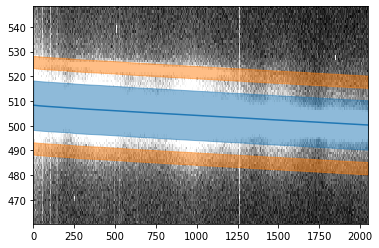

In [7]:
onedspec, skysubflux, fluxerr = extract(img, tr, display=True, apwidth=10, skysep=5, skywidth=5)

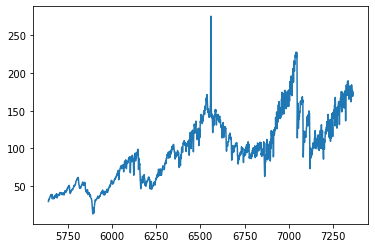

In [8]:
# this data comes from the APO DIS red channel, which has wavelength axis backwards
# (despite not mentioning in the header)
approx_wave = (np.arange(img.shape[1]) - img.shape[1]/2)[::-1] * img.header['DISPDW'] + img.header['DISPWC']

plt.plot(approx_wave, onedspec - skysubflux)